<a href="https://colab.research.google.com/github/BrendaMep/Profinal/blob/main/DiagramaMWcdgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este programa te permite calcular los diagramas de Voronoi, el cual fue utilizado para generar los diagramas MW usados en la tesis de nombre "***Una aplicación de los diagramas de Voronoi en análisis de patrones de conducta***"

Autor: Brenda Zarahi Medina Pérez


Diagramas de Voronoi

Dado un conjunto finito de n puntos (x_1,y_1 ),(x_2,y_2 ),…, (x_n,y_n) en el plano, un diagrama de Voronoi es una división de éste en n regiones, a los n puntos se les conoce como generadores. Cabe destacar que a cada región le corresponde un único generador. Las regiones están compuestas por aquellos puntos que se encuentran más cercanos a algún generador, estas regiones reciben el nombre de polígonos de Voronoi. 

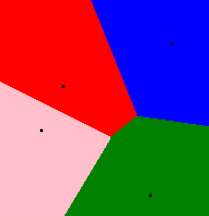

En la figura anterior se muestran los polígonos de Voronoi de cuatro puntos en el plano, estos se identifican por diferentes colores.


En el caso anterior, los generadores se encuentran uniformemente ponderados; es decir, todos tienen el mismo valor o peso. Si a éstos se les asigna diferente valor o peso, entonces se pueden generar diagramas de Voronoi ponderados. En este programa se  consideran los diagramas de Voronoi ponderados multiplicativamente.

In [ ]:
#Bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import matplotlib.colors as colors
from numpy.ma.core import sqrt
import matplotlib.colors as colors
from scipy.spatial import distance
from re import I
import pandas as pd
from google.colab import files

In [ ]:
#Aqui se obtiene el radio de la circunferencia 
def radio(wm, wr, m1,m2,r1,r2 ):
  norm = sqrt((m1-r1)**2+(m2-r2)**2)
  r = abs( (wm*wr) / (wm**2-wr**2) * norm)  
  return r

#Aqui se obtiene el centro
def centro(wm, wr, m1,m2,r1,r2 ):
  arr1 = np.array([r1,r2])* (wm**2)/(wm**2-wr**2)
  arr2 = np.array([m1,m2])*(wr**2)/(wm**2-wr**2)
  o = arr1-arr2
  return o

#ordenar los generadores de mayor a menor peso

def partition(array,P, ini, fin):
    pivot = array[fin]
    i = ini - 1
    for j in range(ini, fin):
        if array[j] <= pivot:
            i = i + 1
            (array[i], array[j]) = (array[j], array[i])
            (P[i], P[j]) = (P[j], P[i])
    (array[i + 1], array[fin]) = (array[fin], array[i + 1])
    (P[i + 1], P[fin]) = (P[fin], P[i + 1])
    return i + 1

def metodo_4(array,P, ini, fin):
    if ini < fin:
        pos = partition(array,P, ini, fin)
        metodo_4(array,P, ini, pos - 1)
        metodo_4(array,P, pos + 1, fin)

#Tipos de dominios
class circle:
    def __init__(self,radio,x,y):
        self.radio = radio
        self.x = x
        self.y = y
    def esta_en_circulo(self,x1,y1):
        if (self.x-x1)*(self.x-x1)+(self.y-y1)*(self.y-y1) <= self.radio*self.radio :
            return (x1,y1)

#peso es mayor
class com_circle:
    def __init__(self,radio,x,y):
        self.radio = radio
        self.x = x
        self.y = y
    def complemento_cir(self,x1,y1):
        if (self.x-x1)*(self.x-x1)+(self.y-y1)*(self.y-y1) >= self.radio*self.radio :
            return (x1,y1)
#Mismo peso
class semiplano:
    def __init__(self,x1,y1,x2,y2):
        m1 = (x1+x2)/2
        m2 = (y1+y2)/2
        if (y2-y1) == 0:
          r = 1
          j = m1
        else:
          j = 0
          r = -(x2-x1)/(y2-y1)
        self.m1 = m1
        self.m2 = m2
        self.r = r
        self.x1 = x1
        self.y1 = y1
        self.y2 = y2
        self.j = j
    def en_semiplano(self,x,y):
        if (self.y2-self.y1) == 0:
          if self.x1 > self.j and x>= self.j:
            return (x,y)
          if self.x1 < self.j and x<= self.j:
            return (x,y)
        else:
          if self.r*(self.x1-self.m1)+self.m2-self.y1 <= self.j and self.r*(x-self.m1)+self.m2-y <=self.j:
              return (x,y)
          if self.r*(self.x1-self.m1)+self.m2-self.y1 >= self.j and self.r*(x-self.m1)+self.m2-y >=self.j:
              return (x,y)

def Dominio(wm, wr, m1,m2,r1,r2 ):
  if wm == wr:
    return semiplano(m1,m2,r1,r2)
  else:
    r = radio(wm, wr, m1,m2,r1,r2 )
    o = centro(wm, wr, m1,m2,r1,r2 )
    if wm<wr:
      return circle(r, o[0],o[1])
    else:
      return com_circle(r, o[0],o[1])

#Generación de  la región de Voronoi

def in_area(point,d):
  z = len(d)
  wq = []
  for i in range(z):
    if type(d[i]) == circle:
       wq.append(d[i].esta_en_circulo(*point))
    else:
      if type(d[i]) == com_circle:
        wq.append( d[i].complemento_cir(*point))
      else:
       wq.append( d[i].en_semiplano(*point))
  WQ=wq[0]
  for i in range(z):
    WQ= WQ and wq[i]
  if WQ :
    return True
  return False

def puntos_region(pes_max,x_max,y_max,z,x_z,y_z):
  px = radio(z,pes_max,x_z,y_z,x_max,y_max)
  op = centro(z,pes_max,x_z,y_z,x_max,y_max)
  if op[0]-px <100:
    q1 = 0
  else:
    q1 = op[0]-px
  if op[0]+px > 100:
    q2 = 100
  else:
    q2 = op[0]+px
  if op[1]-px <100:
    t1 = 0
  else:
    t1 = op[1]-px
  if op[1]+px >100:
    t2 = 100
  else:
    t2 = op[1]+px
  return q1,q2,t1,t2
  
#Asignación de color
def colores(n):
  l = []
  for i in colors.cnames:
    l.append(i)
  cl = []
  for i in range(n):
    cl.append(l[9+i])
  return cl

In [ ]:
def Voronoi_Ponderado(Conj_G,Conj_peso,cl):
    fig, ax = plt.subplots()
    ax.set(xlim=(0, 100), ylim = (0, 100)) #Dimensión de el espacio experimental
    ns = len(Conj_peso)

    for i in range(ns):
      if i==0:
        ax.set_facecolor(cl[i])
        i=i+1
      else:
        Dom = []
        for k in range(ns):
          if k == i:
            k = k+1
          else:
            c1 = Dominio(Conj_peso[i],Conj_peso[k],Conj_G[i][0],Conj_G[i][1],Conj_G[k][0],Conj_G[k][1])
            Dom.append(c1)
        
        q = puntos_region(Conj_peso[0],Conj_G[0][0],Conj_G[0][1],Conj_peso[i],Conj_G[i][0],Conj_G[i][1])
        x = np.linspace(q[0], q[1], 200, dtype="float")
        y = np.linspace(q[2], q[3], 200, dtype="float")
        

        xx, yy = np.meshgrid(x, y)

        c = []

        for x, y in zip(np.ravel(xx), np.ravel(yy)):
          es_en_area = in_area((x, y),Dom)
          c.append(es_en_area)
        plt.scatter(np.ravel(xx), np.ravel(yy),c, color=cl[i])

    ax.set_title("MW-Diagrama de Voronoi")
    x1,y1=zip(*Conj_G)
    m = [0,50,50,100]
    n = [50,0,100,50]
    ax.scatter(m,n,color="red",marker="D")
    ax.scatter(x1,y1,s=5, color = "black")
    plt.gca().set_aspect('equal')
    plt.show()
